In [4]:
import ROOT,os,glob,math

['./hist/BmumuMerge_data_cut0.root', './hist/BmumuMerge_data_cut7.root']
pt(b/bbar)>0,pTHatMin=0 pt(b/bbar)>5,pTHatMin=7 ['theta_x', 'phi_1', 'phi_2', 'theta_phi_1', 'theta_phi_2']
theta_phi_2
Bmumu_theta_phi_2


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: jpg file figures/Bmumu_theta_phi_2.jpg has been created
Info in <TCanvas::Print>: pdf file figures/Bmumu_theta_phi_2.pdf has been created


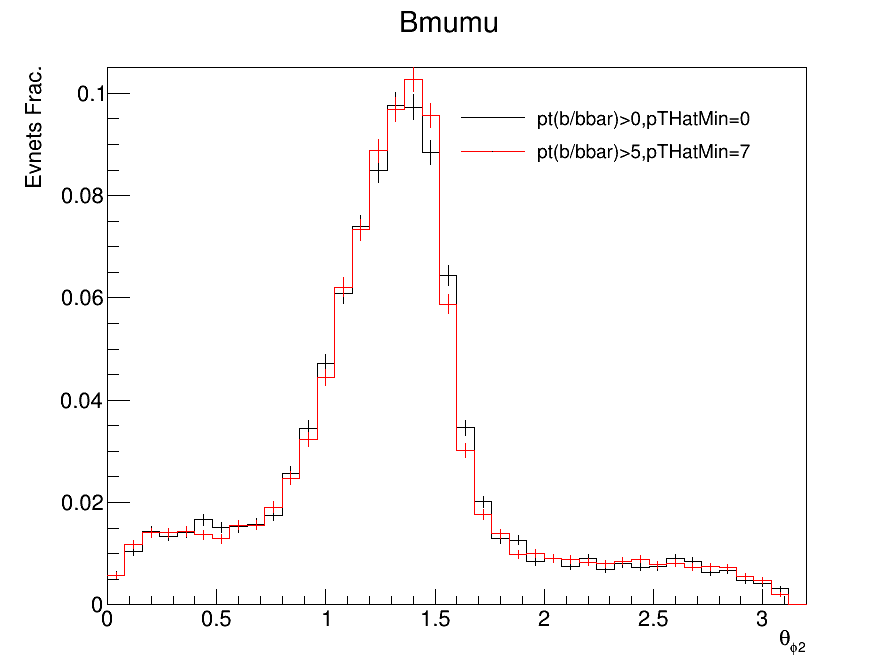

In [15]:
pi=ROOT.TMath.Pi()
path="./hist/"
paths=glob.glob(path+"Bmumu*root")
print(paths)
paths0='./hist/bbJJMerge_data_cut0.root'
paths1='./hist/bbJJMerge_data_cut6.root'
f1=ROOT.TFile(paths[0],"r")
f2=ROOT.TFile(paths[1],"r")
cut1=paths[0].split("_")[-1].split(".")[0].replace("cut0","pt(b/bbar)>0,pTHatMin=0")
cut2=paths[1].split("_")[-1].split(".")[0].replace("cut7","pt(b/bbar)>5,pTHatMin=7")
anglelist=[]
for i in f1.GetListOfKeys():
    #print(i.GetName())
    anglelist.append(i.GetName())
print(cut1,cut2,anglelist)
hist=anglelist[4]
print(hist)
h1=f1.Get(hist)
h2=f2.Get(hist)
h1.Rebin(4)
h2.Rebin(4)
h1.Scale(1/h1.Integral())
h2.Scale(1/h2.Integral())
h1.GetXaxis().SetRangeUser(0,pi)
h1.SetNameTitle("","Bmumu")
#h1.GetXaxis().SetTitle("#theta_{x}")
#h1.GetXaxis().SetTitle("#phi_{#mu1}")
#h1.GetXaxis().SetTitle("#phi_{#mu2}")
#h1.GetXaxis().SetTitle("#theta_{#phi1}")
h1.GetXaxis().SetTitle("#theta_{#phi2}")
h1.GetYaxis().SetTitle("Evnets Frac.")
h1.SetLineColor(1)
h2.SetLineColor(2)
c1=ROOT.TCanvas("c1","c1",100,0,900,700)
c1.SetLeftMargin(0.12)
#c1.SetLogy()
ROOT.gStyle.SetOptStat(0)
h1.Draw("hist e")
h2.Draw("same hist e")
t=ROOT.TLegend(0.5,0.75,0.9,0.85)
#t=ROOT.TLegend(0.35,0.15,0.45,0.25)
t.AddEntry(h1,cut1,"l")
t.AddEntry(h2,cut2,"lp")
t.SetBorderSize(0)
t.SetTextSize(0.03)
t.Draw()
c1.Draw()
name="Bmumu_"+hist
print(name)
c1.SaveAs("figures/"+name+".jpg")
c1.SaveAs("figures/"+name+".pdf")